# U.S. Medical Insurance Costs Analysis: Project Overview and Findings

This notebook analyzes a dataset of US medical insurance costs to uncover insights about the factors affecting insurance charges.


# Project Scope and Goals

## Project Scope
This investigation aims to dissect a comprehensive dataset of healthcare insurance expenses in the United States. Our primary objective is to uncover key determinants influencing insurance premiums and to develop data-driven insights for the industry.

## Project Goals
- **Data Loading and Preprocessing**: Load the dataset, verify data integrity, and perform necessary preprocessing steps.
- **Exploratory Data Analysis (EDA)**: Examine the regional distribution of policyholders, contrast the costs between smokers and non-smokers, and determine the average age of individuals with at least one child.
- **Data Visualization**: Visualize the distribution of ages, the relationship between BMI and insurance charges, and the correlation between variables.
- **Model Building**: Construct and evaluate a linear regression model to predict insurance charges.
- **Bias Analysis**: Investigate potential systemic biases within the dataset, such as premium disparities based on sex.
- **Documentation and Reporting**: Compile findings into a well-structured Jupyter Notebook for easy review.


In [35]:
# Read the CSV File in Your Jupyter Notebook
import pandas as pd
import numpy as np
import warnings  # Import the warnings module

# Load the dataset
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocess the Data
The dataset is preprocessed by dropping missing values and converting data types as necessary.

In [40]:
# Display data types and missing values

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load and preprocess the dataset
with pd.option_context('mode.use_inf_as_na', True):
    # Convert infinite values to NaN and drop missing values
    data = data.replace([float('inf'), float('-inf')], pd.NA).dropna()
    data['age'] = data['age'].astype(int)  # Convert age to integer

# Display the first few rows of the preprocessed dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

In [43]:
# Find average age of the patients
average_age = data['age'].mean()
print(f'Average Age of Patients: {round(average_age,0)}')

# Analyze where most people are from
region_counts = data['region'].value_counts()
print("\nGeographic Distribution of Individuals:\n", region_counts)

# Analyze the difference in costs between smokers vs. non-smokers
smoker_costs = data.groupby('smoker')['charges'].mean()
print("\nAverage Insurance Charges:\n", round(smoker_costs,2))

# Find the average age for a person who has at least one child
average_age_with_child = data[data['children'] > 0]['age'].mean()
print(f'\nAverage Age of Individuals with at Least One Child: {round(average_age_with_child,0)}')

Average Age of Patients: 39.0

Geographic Distribution of Individuals:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Average Insurance Charges:
 smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

Average Age of Individuals with at Least One Child: 40.0


# Data Visualization

## 1. Histogram of Ages
**Description**: This histogram shows the distribution of ages in the dataset.

**Insight**: Age spread shows a balanced distribution, with a slight peak in the 18 - 20 age bracket.

**Implication for Insurance Costs**: Insurance providers might consider the age distribution when pricing policies, as younger individuals generally have different risk profiles compared to older individuals.

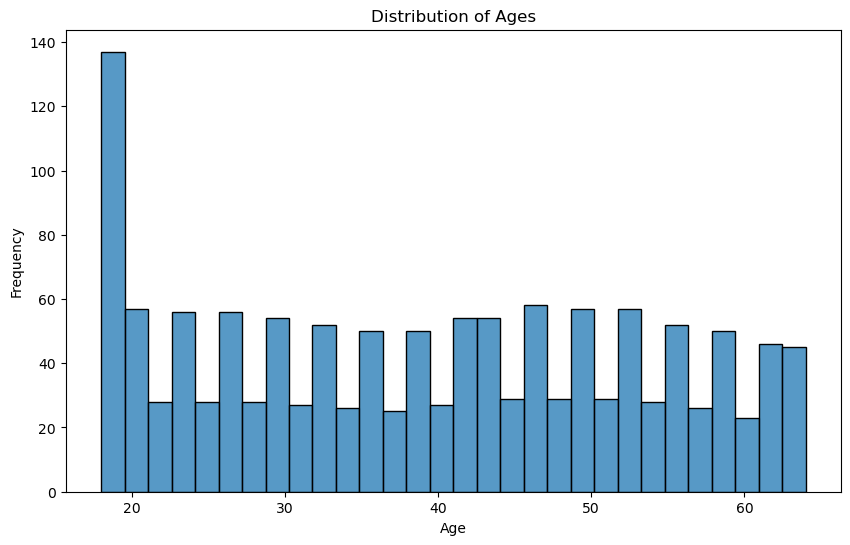

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of ages to show the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.clf()

## 2. Scatter Plot: BMI vs. Charges

**Description**: Scatter diagram comparing Body Mass Index (BMI) to insurance premiums.

**Insight**: A noticeable upward trend in premiums as BMI increases, particularly beyond the 30 BMI threshold.

**Implication for Insurance Costs**: BMI could be a significant factor in premium calculations due to associated health risks associated with obesity.


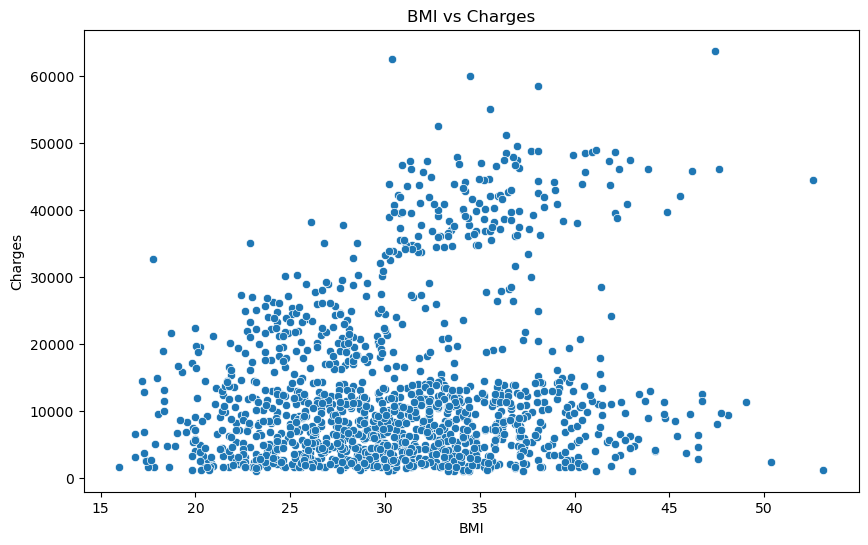

In [50]:
# Scatter plot: BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## 3. Correlation Heatmap

**Description**: Theescription**: This heatmap shows the correlation matrix of numerical variables.

**Insight**: 
- Strong positive correlation between charges and smoker.
- Moderate positive correlation with BMI and age.
- Weak positiorrelation with the number of children.

**Implication for Insurance Costs**: Smoking status, BMI, and age are significant factors, suggesting that insurance companies could focus on these variables for risk assessment and premium calculation.


## 3. Correlation Heatmap

**Description**: Theescription**: This heatmap shows the correlation matrix of numerical variables.

**Insight**: 
- Strong positive correlation between charges and smoker.
- Moderate positive correlation with BMI and age.
- Weak positiorrelation with the number of children.

**Implication for Insurance Costs**: Smoking status, BMI, and age are significant factors, suggesting that insurance companies could focus on these variables for risk assessment and premium calculation.


## 3. Correlation Heatmap

**Description**: The heatmap visualizes the correlation matrix of the insurance dataset, showing the relationships between various variables such as age, sex, BMI, number of children, smoker status, region, and insurance charges.

#### Key Insights:

1. **High Positive Correlation:**
   - **Smoker and Charges (0.79):** There is a strong positive correlation between being a smoker and the insurance charges. This suggests that smokers tend to have significantly higher insurance charges.

2. **Moderate Positive Correlation:**
   - **Age and Charges (0.3):** There is a moderate positive correlation between age and insurance charges. Older individuals tend to have higher insurance charges.
   - **BMI and Charges (0.2):** A moderate positive correlation exists between BMI and insurance charges, indicating that individuals with higher BMI tend to have higher insurance charges.

3. **Negative Correlations:**
   - **Region (Northwest, Southeast, Southwest) with Other Variables:** The correlations between different regions and other variables are generally low, indicating minimal regional impact on other factors.

4. **Other Correlations:**
   - **Sex and Other Variables:** The correlation of sex with other variables is low, indicating that sex does not have a strong impact on other factors in the dataset.

#### Implications:

1. **Health and Lifestyle Impact:**
   - The strong positive correlation between smoking status and insurance charges highlights the significant impact of smoking on health-related expenses. This insight can be useful for insurance companies when designing premiums and health intervention programs.

2. **Age and Health Costs:**
   - The moderate positive correlation between age and insurance charges suggests that health costs tend to increase with age. This information is crucial for long-term planning and actuarial calculations in the insurance industry.

3. **BMI and Insurance Charges:**
   - The correlation between BMI and insurance charges indicates that higher BMI is associated with higher health costs. This insight can guide health promotion and weight management programs to reduce overall health expenses.

4. **Regional Considerations:**
   - The minimal impact of region on other variables suggests that insurance charges and other factors are relatively consistent across different regions. This can simplify the pricing models for insurance products.

5. **Policy Design:**
   - Understanding these correlations can help insurance companies design better policies and targeted interventions. For instance, offering discounts or incentives for non-smokers or individuals maintaining a healthy BMI could be effective strategies.

### Conclusion

The heatmap provides a clear and concise visualization of the relationships between various factors in the insurance dataset. By understanding these correlations, stakeholders can make informed decisions about policy design, pricing, and health interventions to manage costs and improve health outcomes.

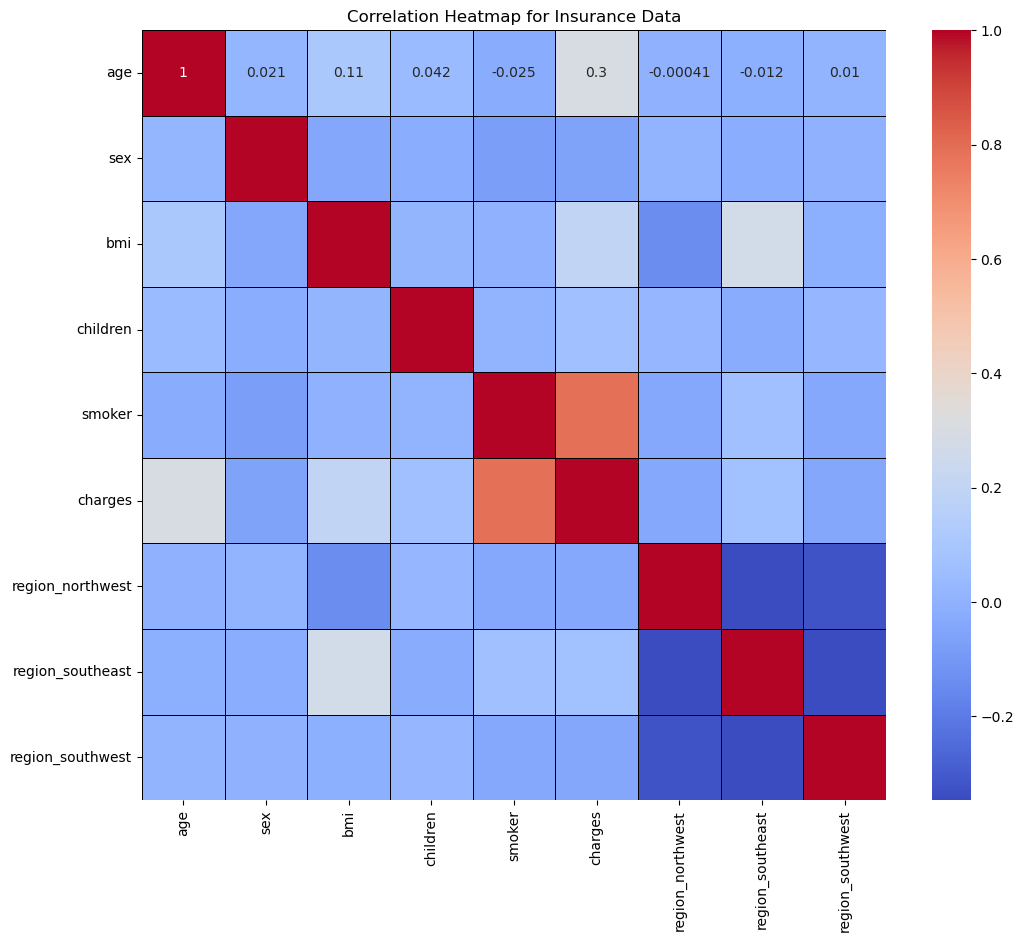

In [55]:
# Correlation heatmap to show correlation between numeric variables

# Convert categorical variables to numerical values for correlation calculation
insurance_data_encoded = data.copy()

# Encoding categorical variables
insurance_data_encoded['sex'] = insurance_data_encoded['sex'].map({'male': 0, 'female': 1})
insurance_data_encoded['smoker'] = insurance_data_encoded['smoker'].map({'yes': 1, 'no': 0})
insurance_data_encoded = pd.get_dummies(insurance_data_encoded, columns=['region'], drop_first=True)

# Calculate the correlation matrix
corr_insurance = insurance_data_encoded.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_insurance, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for Insurance Data')
plt.show()

## 4. Linear Regression Model (Actual vs. Predicted Charges)
**Description**: Scatter plot of actual vs. model-predicted premiums.


**Insight**: The model provides a baseline for predicting insurance charges but could be improved with more comprehensive data.

**Implication for Insurance Costs** The model provides a baseline for predicting insurance charges but could be improved with more comprehensive data.


Mean Squared Error: 131201335.64669806
R-squared: 0.15489592484270753


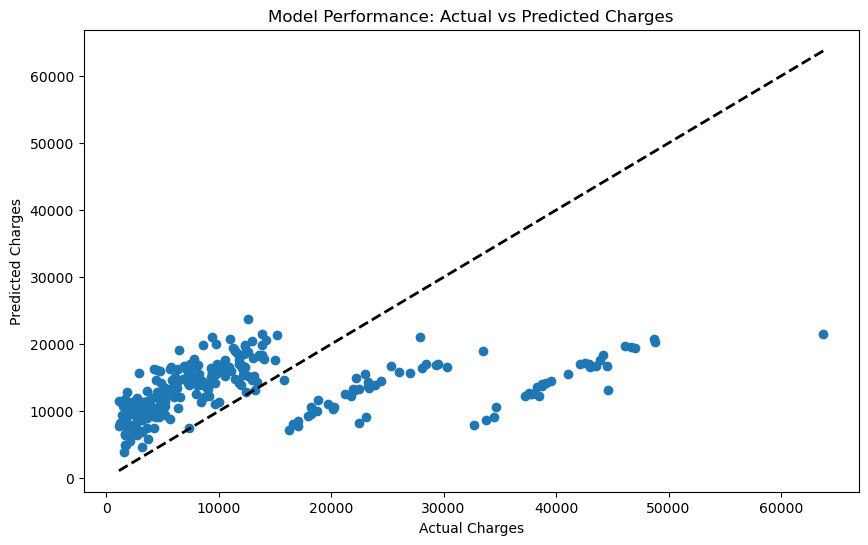

<Figure size 640x480 with 0 Axes>

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def build_linear_regression_model(X, y):
    """
    Build and evaluate a linear regression model.
    
    Parameters:
    X (pandas.DataFrame): Feature variables
    y (pandas.Series): Target variable
    
    Returns:
    tuple: Trained model, mean squared error, and R-squared score
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return model, mse, r2, X_test, y_test, predictions

# Build and evaluate the linear regression model
X = data[['age', 'bmi', 'children']]
y = data['charges']

model, mse, r2, X_test, y_test, predictions = build_linear_regression_model(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Model Performance: Actual vs Predicted Charges')
plt.show()
plt.clf()

## 5. Box Plot: Charges by Sex
**Description**: This box plot compares insurance charges between males and females



**Insight**: Males generally have higher median charges, but the difference is minor compared to other factors like smoking status and BM


**Implication for Insurance Costs**: Gender may be a less critical factor in premium calculations compared to lifestyle and health indicators.


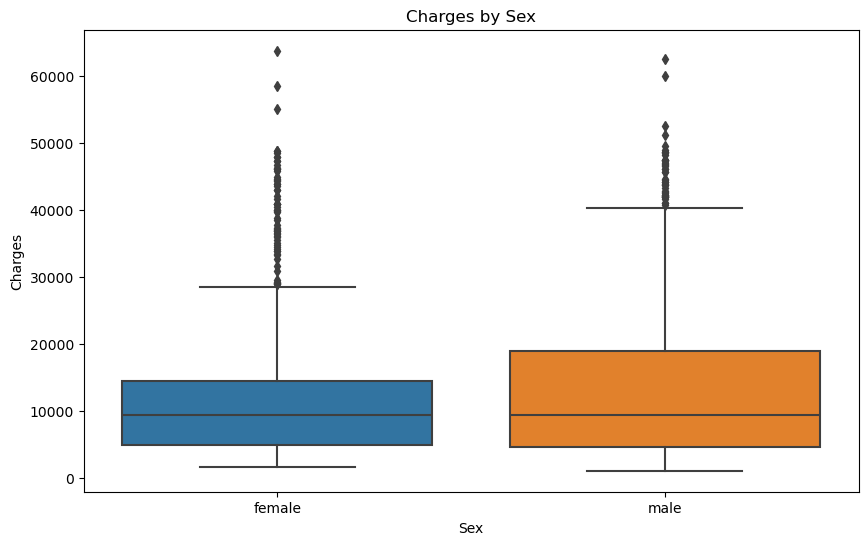

In [61]:
# Analyze and assess potential biases in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Conclusions and Strategic Recommendations

**Age, BMI, and Smoking Status are Key Factors**:
- **Insight**: These factors significantly influence insurance charges.
- **Action**: Develop tailored policies and risk management strategies for high-risk segments.

**Health-Related Variables Over Demographics**:
- **Insight**: Health-related variables show stronger correlations with premiums than demographic factors..
- **Action**: Enhance underwriting processes to focus more on health assessments and lifestyle indicatorss to better predict risk and determine premiums.

**Model Enhancement and Comprehensive Dataa**:
- **Insight**: The linear regression model is useful but can be improved with mor comprehensive data and analysis..
- **Action**: Expand the dataset, incorporate additional relevant variables, and explore more sophisticated modeling approaches to improve prediction accuracy and risk assessment.